In [1071]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [1072]:
hourly = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv', sep=',')

# changing date dtype

In [1073]:
# checking if it is the same as the daily dataset -yes
# Assuming your data is stored in a DataFrame called df
# Convert 'Date' column to datetime if it's not already in datetime format
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter rows where 'Date' is greater than '2021-01-01' and sum up the 'Casual' column
sum_casual = hourly[hourly['Date'] == '2021-01-02']['Casual'].sum()

print("Total sum of 'Casual' after 2021-01-02:", sum_casual)

Total sum of 'Casual' after 2021-01-02: 2874.0


In [1074]:
hourly
hourly.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 1.8 MB


# check for missing values


In [1075]:
# Check for missing values
missing_values = hourly.isnull().sum()
missing_values

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [1076]:
# Handle missing values (if necessary)
# For example, you can drop rows with missing values using df.dropna(), 
# fill missing values with a specific value using df.fillna(), or 
# interpolate missing values using df.interpolate().

# Example of dropping rows with missing values
# df.dropna(inplace=True)
# Example of filling missing values with mean
# df.fillna(df.mean(), inplace=True)

# Example of interpolating missing values
# df.interpolate(method='linear', inplace=True)

# Now, your dataset is cleaned from missing values

# checking for raws with missing values


In [1077]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Load your dataset into 'df' using pd.read_csv() or any other method

# Filter the DataFrame to show only rows where at least one variable contains a missing value
rows_with_missing_values = hourly[hourly.isnull().any(axis=1)]

# Display the filtered DataFrame
print("Rows with Missing Values:")
print(rows_with_missing_values)

Rows with Missing Values:
       Casual       Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
21853     NaN 2021-01-21     3     NaN          NaN                       73   
21854     NaN 2021-01-22     3     NaN          NaN                       71   
21855     NaN 2021-02-02     3     NaN          NaN                       86   
21856     NaN 2021-02-03     2     NaN          NaN                       71   
21857     NaN 2021-02-09     1     NaN          NaN                       82   
21858     NaN 2021-02-19     2     NaN          NaN                       94   
21859     NaN 2021-02-19     3     NaN          NaN                       93   
21860     NaN 2021-03-14     2     NaN          NaN                       56   
21861     NaN 2022-01-04     2     NaN          NaN                       77   
21862     NaN 2022-03-13     2     NaN          NaN                       50   
21863     NaN 2023-03-12     2     NaN          NaN                       72   

       temper

In [1078]:
# Example of dropping rows with missing values
hourly.dropna(inplace=True)

In [1079]:
#hourly.reset_index(inplace=True)
hourly = hourly.dropna().reset_index(drop=True)

In [1080]:
hourly.shape

(26269, 9)

In [1081]:
hourly.tail(2)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
26267,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7
26268,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7


# checking for duplicates

In [1082]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Load your dataset into 'df' using pd.read_csv() or any other method

# Check for duplicates
duplicates = hourly[hourly.duplicated()]

# Print the duplicates (if any)
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [1083]:
#  we could create : season, year, holiday, weekday, workingday

In [1084]:
hourly.head(1)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2


# create year, month and weekday columns

In [1085]:
# Extract year, month, and weekday
hourly['year'] = hourly['Date'].dt.year
hourly['month'] = hourly['Date'].dt.month_name()
hourly['weekday'] = hourly['Date'].dt.day_name()  # Monday=0, Sunday=6


In [1086]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26269 non-null  datetime64[ns]
 2   Hour                     26269 non-null  int64         
 3   Member                   26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   relativehumidity_2m (%)  26269 non-null  int64         
 6   temperature_2m (°C)      26269 non-null  float64       
 7   weathercode (wmo code)   26269 non-null  int64         
 8   windspeed_10m (km/h)     26269 non-null  float64       
 9   year                     26269 non-null  int32         
 10  month                    26269 non-null  object        
 11  weekday                  26269 non-null  object        
dtypes: datetime64[ns](1), float64(5)

# create a seasons column

In [1087]:
# Define a mapping of months to seasons
month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall',
    'December': 'Winter'
}
# Create the season column based on the month names
hourly['season'] = hourly['month'].map(month_to_season)

# plot rides per season per hour

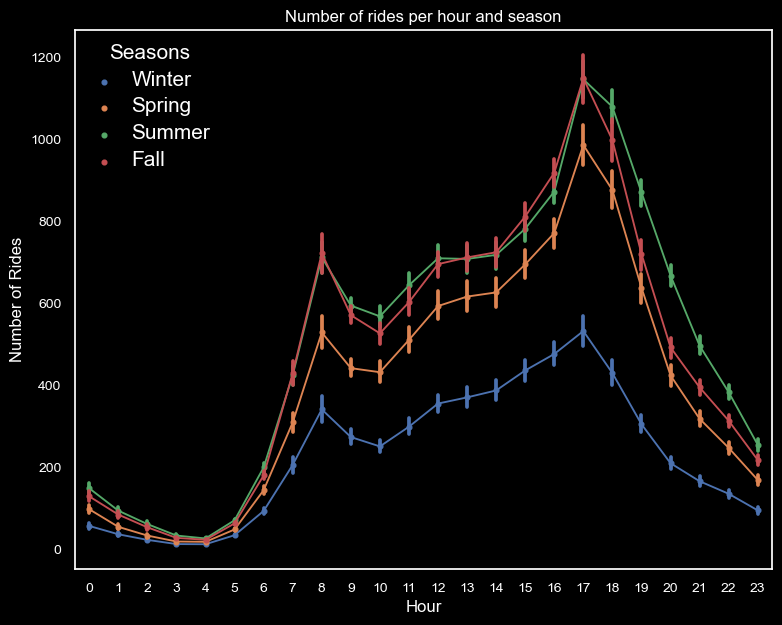

In [1088]:
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
fig , ax = plt.subplots (figsize = (9,7))

sns.pointplot(x='Hour', y='Total_rides', hue='season', scale=0.5, data=hourly)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Number of rides per hour and season', color='white')
plt.xlabel('Hour', color='white')
plt.ylabel('Number of Rides', color='white')


plt.setp(ax.get_legend().get_texts(), fontsize='15', color='white') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15', color='white') # for legend title
ax.get_legend().set_frame_on(False)
ax.get_legend().set_title("Seasons")

# create 'is_holiday' column

In [1089]:
from datetime import datetime
import holidays

# Define holidays for a specific country (e.g., USA)
us_holidays = holidays.US()

# Create a new column indicating whether each date is a holiday or not
hourly['is_holiday'] = hourly['Date'].apply(lambda x: 'Yes' if x in us_holidays else 'No')



In [1090]:
hourly.head(3)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),year,month,weekday,season,is_holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,January,Friday,Winter,Yes
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,January,Friday,Winter,Yes
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,January,Friday,Winter,Yes


Text(0, 0.5, 'Total rides')

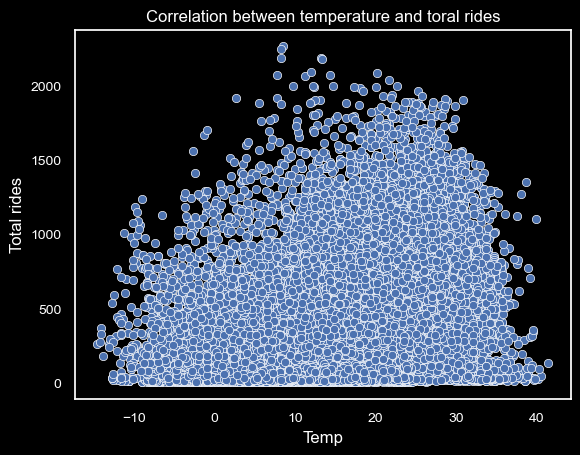

In [1091]:
sns.scatterplot(y='Total_rides', x='temperature_2m (°C)', data=hourly)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Correlation between temperature and toral rides', color='white')
plt.xlabel('Temp', color='white')
plt.ylabel('Total rides', color='white')



Text(0, 0.5, 'Total rides')

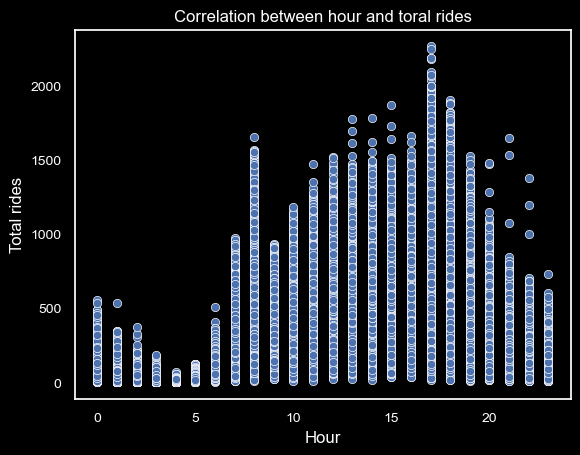

In [1092]:
sns.scatterplot(y='Total_rides', x='Hour', data=hourly)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Correlation between hour and toral rides', color='white')
plt.xlabel('Hour', color='white')
plt.ylabel('Total rides', color='white')
# Fit a linear regression line
#x = hourly['Hour']
#y = hourly['Total_rides']
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x + b, color='red')  # adding the linear line

#plt.show()

# plot 'is_holiday' per hour

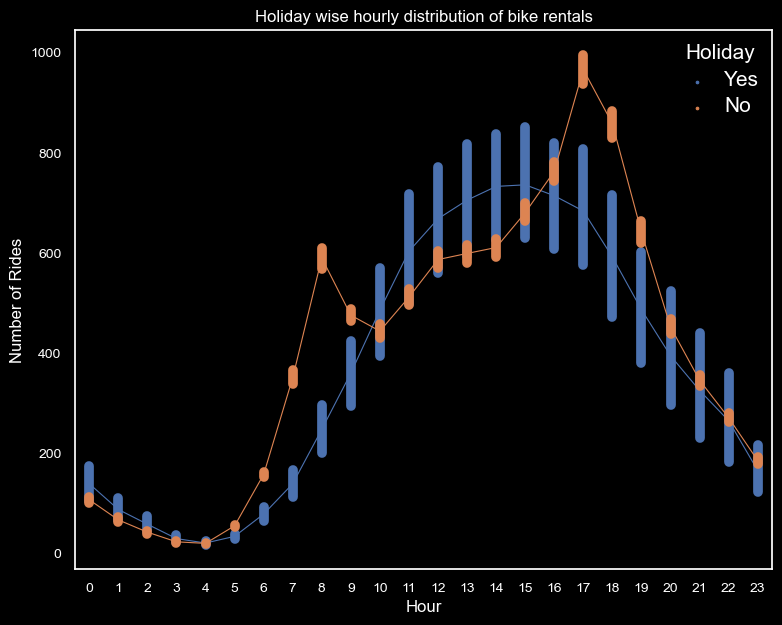

In [1093]:
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
fig , ax = plt.subplots (figsize = (9,7))

sns.pointplot(x='Hour', y='Total_rides', hue='is_holiday', scale=0.3, errwidth=7, data=hourly)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Holiday wise hourly distribution of bike rentals', color='white')
plt.xlabel('Hour', color='white')
plt.ylabel('Number of Rides', color='white')


plt.setp(ax.get_legend().get_texts(), fontsize='15', color='white') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15', color='white') # for legend title
ax.get_legend().set_frame_on(False)
ax.get_legend().set_title("Holiday")

# plot avg number of rides per month

Text(0, 0.5, 'Average number of rides')

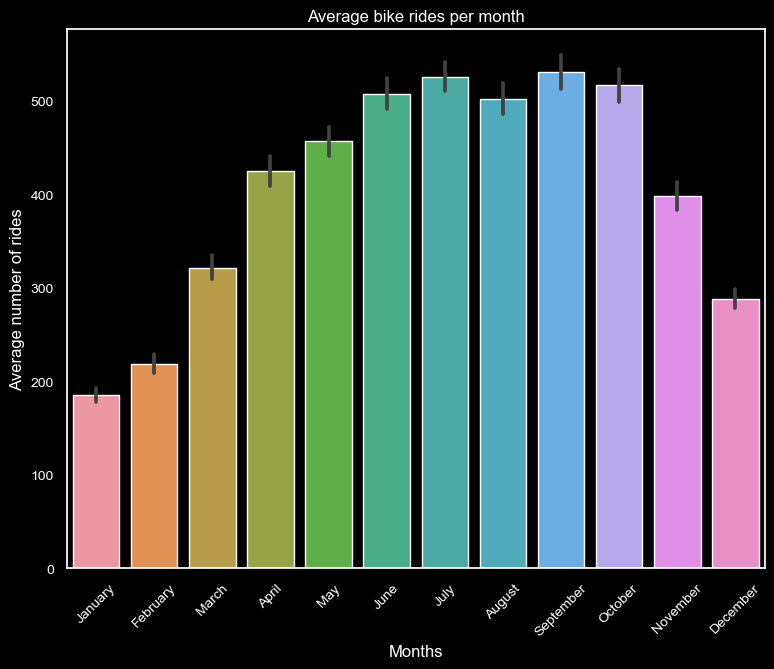

In [1094]:
fig , ax = plt.subplots (figsize = (9,7))
sns.barplot(x='month', y='Total_rides', data=hourly)
plt.xticks(fontsize=10, color='white', rotation=45)
plt.yticks(fontsize=10, color='white')
plt.title('Average bike rides per month', color='white')
plt.xlabel('Months', color='white')
plt.ylabel('Average number of rides', color='white')

# create an 'is weekend' column

In [1095]:
# Create the 'is_weekend' column
hourly['is_weekend'] = (hourly['Date'].dt.dayofweek // 5 == 1).map({True: 'Yes', False: 'No'})


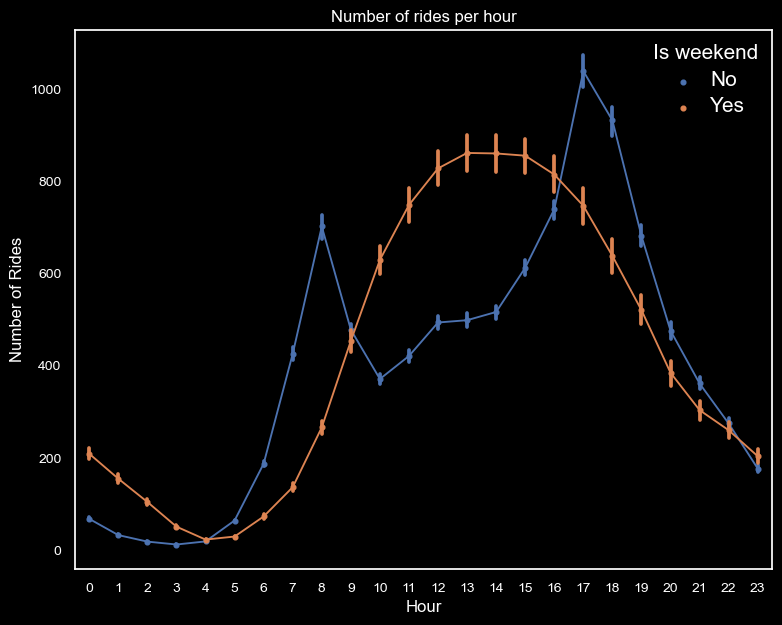

In [1096]:
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
fig , ax = plt.subplots (figsize = (9,7))

sns.pointplot(x='Hour', y='Total_rides', hue='is_weekend', scale=0.5, data=hourly, estimator='mean')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Number of rides per hour', color='white')
plt.xlabel('Hour', color='white')
plt.ylabel('Number of Rides', color='white')


plt.setp(ax.get_legend().get_texts(), fontsize='15', color='white') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15', color='white') # for legend title
ax.get_legend().set_frame_on(False)
ax.get_legend().set_title("Is weekend")

In [1097]:
hourly.head(1)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),year,month,weekday,season,is_holiday,is_weekend
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,January,Friday,Winter,Yes,No


Text(0, 0.5, 'Number of Rides')

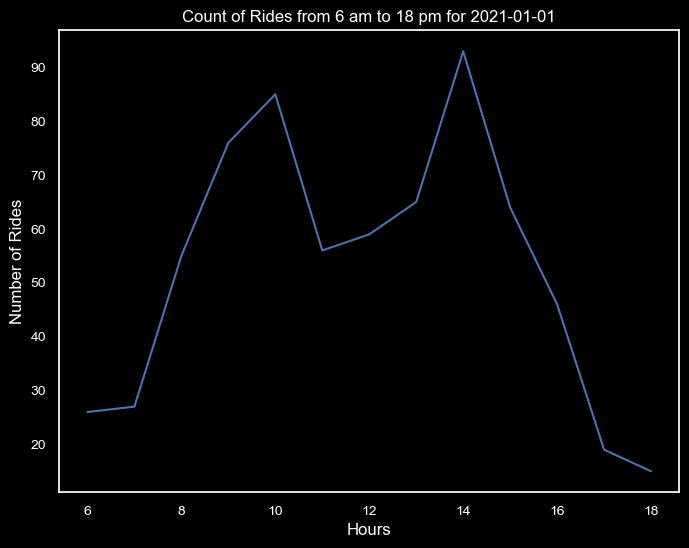

In [1098]:
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
# Filter the DataFrame for a specific month and year
target_date = '2021-01-01'	
# Filter the DataFrame for the specified date and time range (from 6 am to 6 pm)
filtered_df = hourly[(hourly['Date'] == target_date) & (hourly['Hour'] >= 6) & (hourly['Hour'] <= 18)]


plt.figure(figsize=(8, 6))
sns.lineplot(data=filtered_df, x='Hour', y='Total_rides')
plt.title(f'Count of Rides from 6 am to 18 pm for {target_date}', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.xlabel('Hours', color='white')
plt.ylabel('Number of Rides', color='white')
#plt.legend(title='User Type')
#plt.xticks(rotation=0)
#plt.tight_layout()
#plt.show()

In [1099]:
hourly.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)', 'year', 'month',
       'weekday', 'season', 'is_holiday', 'is_weekend'],
      dtype='object')

# Prepare the data for fitting it into a lineral model

## filtering the data 22 pm -5 am

In [1100]:
mask_start = (hourly['Hour'] >= 22) | (hourly['Hour'] < 5)

# Apply the mask to filter the DataFrame
night = hourly[mask_start]

Text(0, 0.5, 'Total rides')

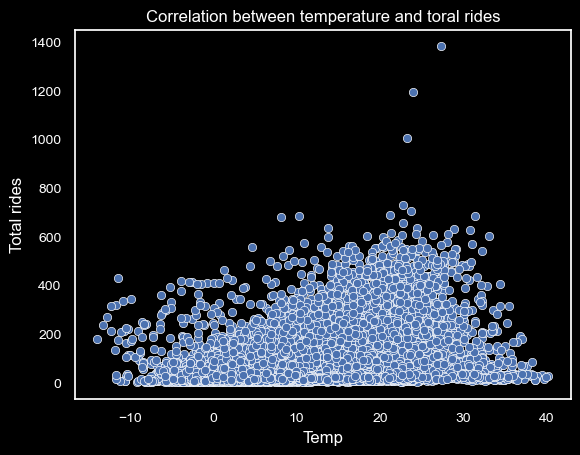

In [1101]:
sns.scatterplot(y='Total_rides', x='temperature_2m (°C)', data=night)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Correlation between temperature and toral rides', color='white')
plt.xlabel('Temp', color='white')
plt.ylabel('Total rides', color='white')


Text(0, 0.5, 'Total rides')

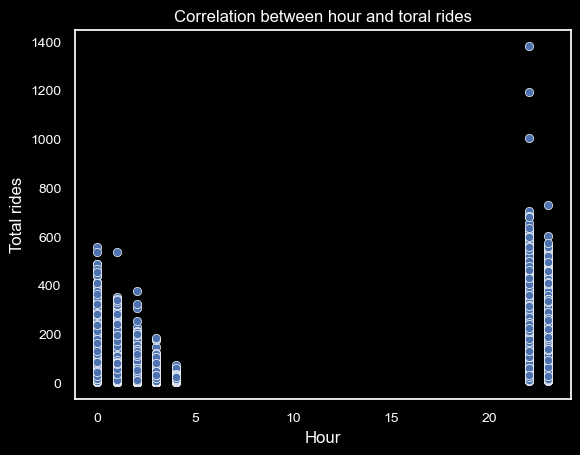

In [1102]:
order=[22, 23, 0, 1, 2 ,3 ,4]

sns.scatterplot(y='Total_rides', x='Hour', data=night)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Correlation between hour and toral rides', color='white')
plt.xlabel('Hour', color='white')
plt.ylabel('Total rides', color='white')

Text(0, 0.5, 'Total rides')

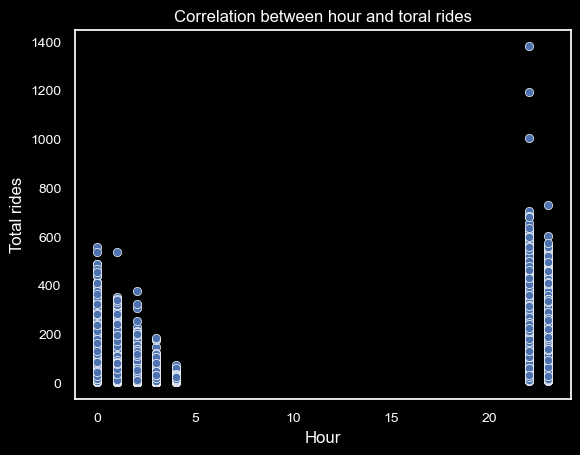

In [1103]:
order=[22, 23, 0, 1, 2 ,3 ,4]

sns.scatterplot(y='Total_rides', x='Hour', data=night)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.title('Correlation between hour and toral rides', color='white')
plt.xlabel('Hour', color='white')
plt.ylabel('Total rides', color='white')

## removing unnecessary columns

In [1104]:
night.drop(columns=['Casual', 'Date', 'Member', 'weathercode (wmo code)', 'is_weekend','month'], inplace=True)

C:\Users\gabb_\AppData\Local\Temp\ipykernel_38736\718329587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night.drop(columns=['Casual', 'Date', 'Member', 'weathercode (wmo code)', 'is_weekend','month'], inplace=True)


In [1105]:
night.head(3)

,Hour,Total_rides,relativehumidity_2m (%),temperature_2m (°C),windspeed_10m (km/h),year,weekday,season,is_holiday
0,0,46.0,90,2.4,10.2,2021,Friday,Winter,Yes
1,1,46.0,88,1.8,10.0,2021,Friday,Winter,Yes
2,2,48.0,87,1.1,10.1,2021,Friday,Winter,Yes


## plotting a heatmap to see chich features should stay

In [1106]:
# Split 'weekday' into 'workday' and 'weekendday'
workdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
night['workday'] = night['weekday'].apply(lambda x: 1 if x in workdays else 0)
night['weekendday'] = night['weekday'].apply(lambda x: 1 if x not in workdays else 0)

C:\Users\gabb_\AppData\Local\Temp\ipykernel_38736\4294572309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['workday'] = night['weekday'].apply(lambda x: 1 if x in workdays else 0)
C:\Users\gabb_\AppData\Local\Temp\ipykernel_38736\4294572309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['weekendday'] = night['weekday'].apply(lambda x: 1 if x not in workdays else 0)


In [1107]:
# Drop the original 'weekday' column
night.drop('weekday', axis=1, inplace=True)


C:\Users\gabb_\AppData\Local\Temp\ipykernel_38736\1141843495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night.drop('weekday', axis=1, inplace=True)


In [1108]:
night.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 0 to 26268
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     7654 non-null   int64  
 1   Total_rides              7654 non-null   float64
 2   relativehumidity_2m (%)  7654 non-null   int64  
 3   temperature_2m (°C)      7654 non-null   float64
 4   windspeed_10m (km/h)     7654 non-null   float64
 5   year                     7654 non-null   int32  
 6   season                   7654 non-null   object 
 7   is_holiday               7654 non-null   object 
 8   workday                  7654 non-null   int64  
 9   weekendday               7654 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 627.9+ KB


In [1109]:
from sklearn.preprocessing import LabelEncoder

In [1110]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

night['is_holiday_encoded'] = label_encoder.fit_transform(night['is_holiday'])

# Drop the original categorical columns
night.drop(['is_holiday'], axis=1, inplace=True)

C:\Users\gabb_\AppData\Local\Temp\ipykernel_38736\123332026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['is_holiday_encoded'] = label_encoder.fit_transform(night['is_holiday'])
C:\Users\gabb_\AppData\Local\Temp\ipykernel_38736\123332026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night.drop(['is_holiday'], axis=1, inplace=True)


In [1111]:
night.head(2)

,Hour,Total_rides,relativehumidity_2m (%),temperature_2m (°C),windspeed_10m (km/h),year,season,workday,weekendday,is_holiday_encoded
0,0,46.0,90,2.4,10.2,2021,Winter,1,0,1
1,1,46.0,88,1.8,10.0,2021,Winter,1,0,1


In [1112]:
# Perform one-hot encoding on 'seasons' column
night_encoded = pd.get_dummies(night['season'], prefix='season', dtype=int)

In [1113]:
night_encoded.columns

Index(['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter'], dtype='object')

In [1114]:
# Concatenate the encoded columns with the original DataFrame
encoded_night = pd.concat([night, night_encoded], axis=1)


In [1115]:
encoded_night.head(2)

,Hour,Total_rides,relativehumidity_2m (%),temperature_2m (°C),windspeed_10m (km/h),year,season,workday,weekendday,is_holiday_encoded,season_Fall,season_Spring,season_Summer,season_Winter
0,0,46.0,90,2.4,10.2,2021,Winter,1,0,1,0,0,0,1
1,1,46.0,88,1.8,10.0,2021,Winter,1,0,1,0,0,0,1


In [1116]:
# Drop the original categorical columns
encoded_night.drop(['season'], axis=1, inplace=True)

## Removing again features which show low correlation

In [1117]:
encoded_night.drop(columns=['windspeed_10m (km/h)', 'workday', 'is_holiday_encoded', 'season_Spring', 'season_Fall', 'season_Winter', 'relativehumidity_2m (%)', 'year', 'season_Summer'], inplace=True)

In [1118]:
corr_heatmap_night=encoded_night.corr()
corr_heatmap_night

,Hour,Total_rides,temperature_2m (°C),weekendday
Hour,1.000000,0.597798,0.008454,-0.000001
Total_rides,0.597798,1.000000,0.279817,0.209665
temperature_2m (°C),0.008454,0.279817,1.000000,-0.023817
weekendday,-0.000001,0.209665,-0.023817,1.000000


Text(0.5, 1.0, 'Night Rides Correlation')

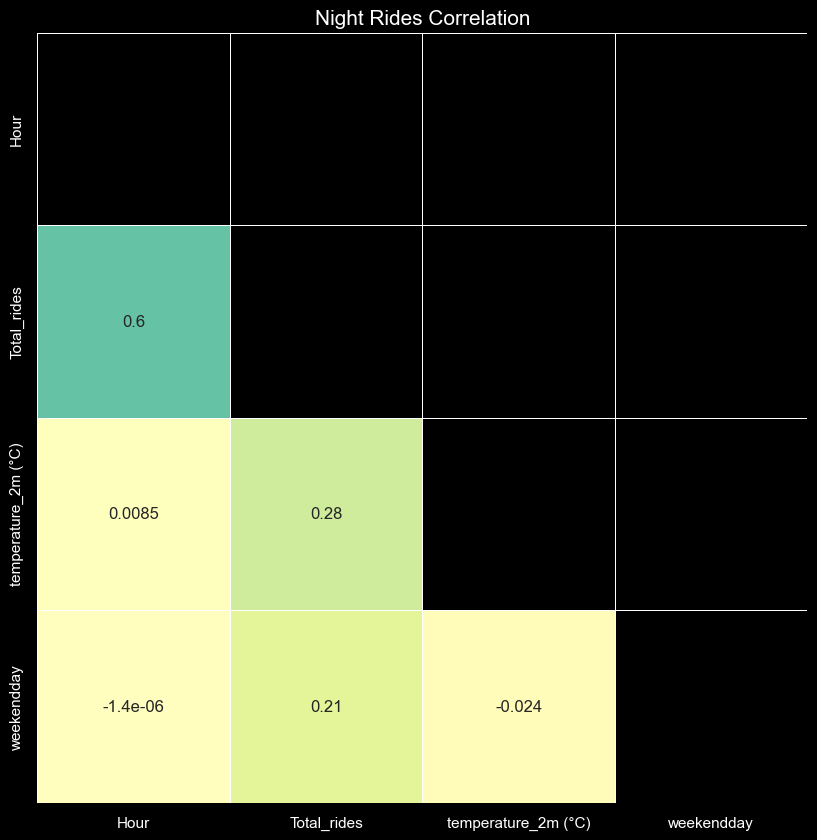

In [1119]:
import numpy as np
matrix=np.triu(corr_heatmap_night)
matrix
fig , ax = plt.subplots (figsize = (10,10))
sns.heatmap(data=corr_heatmap_night, mask=matrix, square=True, cmap='Spectral', vmin=-1, vmax=1, annot=True,cbar=False, linewidths=0.5)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Night Rides Correlation', fontsize=15, color='white')

In [1120]:
encoded_night.head(2)

,Hour,Total_rides,temperature_2m (°C),weekendday
0,0,46.0,2.4,0
1,1,46.0,1.8,0


In [1121]:
# importing libraries
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Target variable
#target = 'Total_rides'

# Loop through each feature
#for feature in encoded_night.columns:
    #if feature != target:  # Exclude the target variable
        #sns.scatterplot(x=target, y=feature, data=encoded_night)
        #plt.title(f'Scatter plot of {feature} vs {target}')
        #plt.xlabel(target)
        #plt.ylabel(feature)
        #plt.show()

## splitting the data

In [1122]:
# Split data into features (X) and target variable (y)
X = encoded_night.drop('Total_rides', axis=1)
y = encoded_night['Total_rides']

In [1123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [1124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Multiple Linear Regression without scaling

In [1125]:
# Initialize Linear Regression model
model = LinearRegression()

In [1126]:
# Fit the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [1127]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 7.88750316  3.51215308 61.02522054]
Intercept: -23.236569823978854


In [1128]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [1129]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#Root Mean Squared Error (RMSE):

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



#Root Mean Squared Error (RMSE):

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# R-squared (R^2):

from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

#Adjusted R-squared:

# Assuming n is the number of samples and p is the number of features
n = len(y_test)
p = X.shape[1]  # Number of features in X

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)


#Mean Percentage Error (MPE):

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_pred) / y_test) * 100
print("Mean Percentage Error:", mpe)


#Mean Absolute Percentage Error (MAPE):

# Calculate Mean Absolute Percentage Error (MAPE)
mape= np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Mean Absolute Error (MAE):

from sklearn.metrics import mean_absolute_error

# Assuming y_true are the true target values and y_pred are the predicted values
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 7953.779395006679
Root Mean Squared Error: 89.183963777165
R-squared: 0.49835127282685987
Adjusted R-squared: 0.49736571540608754
Mean Percentage Error: -86.88149702173155
Mean Absolute Percentage Error: 157.6011830517295
Mean Absolute Error: 62.255384103988526


## Multiple Linear Regression scaling

In [1130]:
# Initialize Linear Regression model
model_1 = LinearRegression()

In [1131]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create an instance of the scaler (choose either MinMaxScaler or StandardScaler)
# Min-Max Scaling
scaler = MinMaxScaler()
# Standardization (Z-score normalization)
# scaler = StandardScaler()

# Fit the scaler to your feature data and transform it
X_scaled = scaler.fit_transform(X)

# X_scaled now contains your scaled feature data

In [1132]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [1133]:
# Fit the model using the training data
model_1.fit(X_train_1, y_train_1)

LinearRegression()

In [1134]:
# Print the coefficients
print("Coefficients:", model_1.coef_)
print("Intercept:", model_1.intercept_)

Coefficients: [181.41257267 190.00748167  61.02522054]
Intercept: -72.05549764763502


In [1135]:
# Make predictions on the testing data
y_pred_1 = model_1.predict(X_test_1)

In [1136]:

from sklearn.metrics import mean_squared_error
# Calculate MSE
# Evaluate the model's performance
mse_1 = mean_squared_error(y_test_1, y_pred_1)
print("Mean Squared Error:", mse_1)

#Root Mean Squared Error (RMSE):




# Calculate RMSE
rmse_1 = np.sqrt(mse_1)
print("Root Mean Squared Error:", rmse_1)



#Root Mean Squared Error (RMSE):

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_1 = mean_squared_error(y_test_1, y_pred_1)

# R-squared (R^2):

from sklearn.metrics import r2_score

# Calculate R-squared
r2_1 = r2_score(y_test_1, y_pred_1)
print("R-squared:", r2_1)

#Adjusted R-squared:

# Assuming n is the number of samples and p is the number of features
n_1 = len(y_test_1)
p_1 = X_scaled.shape[1]  # Number of features in X

# Calculate Adjusted R-squared
adjusted_r2_1= 1 - (1 - r2_1) * (n_1 - 1) / (n_1 - p_1 - 1)
print("Adjusted R-squared:", adjusted_r2_1)


# Mean Absolute Error (MAE):

from sklearn.metrics import mean_absolute_error

# Assuming y_true are the true target values and y_pred are the predicted values
mae_1= mean_absolute_error(y_test_1, y_pred_1)
print("Mean Absolute Error:", mae_1)

#Mean Percentage Error (MPE):

# Calculate Mean Percentage Error (MPE)
mpe_1 = np.mean((y_test_1 - y_pred_1) / y_test_1) * 100
print("Mean Percentage Error:", mpe_1)


#Mean Absolute Percentage Error (MAPE):

# Calculate Mean Absolute Percentage Error (MAPE)
mape_1= np.mean(np.abs((y_test_1 - y_pred_1) / y_test_1)) * 100
print("Mean Absolute Percentage Error:", mape_1)

Mean Squared Error: 7953.779395006684
Root Mean Squared Error: 89.18396377716503
R-squared: 0.4983512728268594
Adjusted R-squared: 0.4973657154060871
Mean Absolute Error: 62.255384103988305
Mean Percentage Error: -86.88149702172171
Mean Absolute Percentage Error: 157.60118305172682


## Polynomial Regression

In [1137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X_3= encoded_night.drop('Total_rides', axis=1)
y_3 = encoded_night['Total_rides']

# Split the dataset into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=32)

# Generate polynomial features
poly_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_3.fit_transform(X_train_3)
X_test_poly_3 = poly_3.transform(X_test_3)

# Initialize and fit the polynomial regression model
model_3 = LinearRegression()
model_3.fit(X_train_poly_3, y_train_3)

# Predict on the testing set
y_pred_3 = model_3.predict(X_test_poly_3)

# Calculate Mean Squared Error
mse_3 = mean_squared_error(y_test_3, y_pred_3)
print("MSE:", mse_3)


mae_3= mean_absolute_error(y_test_3, y_pred_3)
print("MAE:", mae_3)


rmse_3 = np.sqrt(mean_squared_error(y_test_3, y_pred_3))

print("RMSE:", rmse_3)


from sklearn.metrics import r2_score
r2_3 = r2_score(y_test_3, y_pred_3)
print("R2:", r2_3)

MSE: 5024.246379909655
MAE: 39.9750613068975
RMSE: 70.88191856820507
R2: 0.6989370095088536


## Results

In [1138]:
encoded_night.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 0 to 26268
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 7654 non-null   int64  
 1   Total_rides          7654 non-null   float64
 2   temperature_2m (°C)  7654 non-null   float64
 3   weekendday           7654 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 299.0 KB


In [1139]:

# degree:2
#MSE: 5697.57259440023
#MAE: 48.717527654542636
#RMSE: 75.48226675451811
#R2: 0.6406513308941175

#degree:3
#MSE: 4165.754065150299
#MAE: 38.023430450868304
#RMSE: 64.54265306872888
#R2: 0.7372638690719902

#degree:4
#MSE: 5156.418981378757
#MAE: 37.678755889308164
#RMSE: 71.80820970737787
#R2: 0.6747821519410017


In [1140]:
#adding year


# degree:4
#MSE: 7349.307535260711
#MAE: 36.258273002543746
#RMSE: 85.72810236591448
#R2: 0.5364756064290606


#degree: 3

#MSE: 3704.323863686585
#MAE: 36.17090685714759
#RMSE: 60.86315686592822
#R2: 0.7663664958545278

In [1141]:
## removing workday and windspeed

#degree:3
#MSE: 3653.1944105991515
#MAE: 36.10053665893016
#RMSE: 60.44166121640893
#R2: 0.7695912552787674

In [1142]:
## removed is holiday

#degree:3
#MSE: 3742.651938671554
#MAE: 36.385421707312524
#RMSE: 61.177217480623895
#R2: 0.7639491255609443

In [1143]:
## removed spring and fall

#MSE: 3831.089541928929
#MAE: 36.81852157604482
#RMSE: 61.895795834038104
#R2: 0.758371322996272

In [1144]:
## removed humidity, winter

#MSE: 4956.437500985256
#MAE: 40.805259126166725
#RMSE: 70.40197086009209
#R2: 0.6873950809795643

In [1145]:
## removed Summer column:
#MSE: 4898.6317679244285
#MAE: 41.060543260921676
#RMSE: 69.9902262314134
#R2: 0.6910409166223631

In [1146]:
## removed weekend
#MSE: 6171.105738934487
#MAE: 51.661007529962525
#RMSE: 78.55638572983413
#R2: 0.6107853656174045

## Cross validation

In [1161]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare your features X and target y
# Define features (X) and target variable (y)
X_4= encoded_night.drop('Total_rides', axis=1)
y_4 = encoded_night['Total_rides']

# Split the dataset into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

# Define the polynomial degree
degree = 3  # Adjust the degree as needed

# Create a polynomial regression model pipeline

model_4= make_pipeline(PolynomialFeatures(degree, include_bias=False, inclu), LinearRegression())

# Evaluate the model using cross-validation
# Perform k-fold cross-validation
cv_scores = cross_val_score(model_4, X_4, y_4, cv=5, scoring='neg_mean_squared_error')


mse_cv = -np.mean(cv_scores)

#Calculate additional evaluation metrics
mae_cv = -np.mean(cross_val_score(model_4, X_4 , y_4, cv=5, scoring='neg_mean_absolute_error'))
r2_cv = np.mean(cross_val_score(model_4, X_4, y_4, cv=5, scoring='r2'))

# Print the results#
print("Cross-Validation Results:")
print("MSE:", mse_cv)
print("MAE:", mae_cv)
print("R2:", r2_cv)


Cross-Validation Results:
MSE: 5632.00042762815
MAE: 44.327403371273896
R2: 0.6167170990969055


In [1162]:
# Define features (X) and target variable (y)
X = encoded_night.drop('Total_rides', axis=1)
y = encoded_night['Total_rides']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the polynomial degree
degree = 3

# Create a polynomial regression model pipeline
# Note: include_bias=False is used here since LinearRegression will add the intercept
model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

# Perform k-fold cross-validation
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert MSE and MAE to positive values
mse_cv = -np.mean(cv_mse_scores)
mae_cv = -np.mean(cv_mae_scores)
r2_cv = np.mean(cv_r2_scores)

# Print the cross-validation results
print("Cross-Validation Results:")
print(f"MSE: {mse_cv:.3f}")
print(f"MAE: {mae_cv:.3f}")
print(f"R2: {r2_cv:.3f}")

Cross-Validation Results:
MSE: 5632.000
MAE: 44.327
R2: 0.617


In [ ]:
# after removing humidity

#Cross-Validation Results:
#MSE: 5738.765632161722
#MAE: 45.09539612128056
#R2: 0.6081352456894453

In [1148]:
#after I added year:
#Cross-Validation Results:
#MSE: 81152411629.09058
#MAE: 8690.601385328475
#R2: -3169581.238542319

In [1149]:
# after I removed 3 features

#Cross-Validation Results:
#MSE: 13037.952984189189
#MAE: 69.26064605685924
#R2: 0.2993561616180884

In [1150]:

#after removing fall and spring
#Cross-Validation Results:
#MSE: 13225.128107577406
#MAE: 66.53569882054768
#R2: 0.3145621824104493

In [1151]:
# after removing winter

#Cross-Validation Results:
#MSE: 11794.120521812289
#MAE: 64.36083790191529
#R2: 0.3658070962510046

In [1152]:

# after removing humidity

#Cross-Validation Results:
#MSE: 5738.765632161722
#MAE: 45.09539612128056
#R2: 0.6081352456894453

In [1153]:
#after removing Summer
#Cross-Validation Results:
#MSE: 5735.749227407192
#MAE: 45.42813896204383
#R2: 0.6064354649079067

In [1154]:
#after removing weekendday
#Cross-Validation Results:
#MSE: 7349.030303981743
#MAE: 56.89039172296479
#R2: 0.49911602826394263

## Polynomial plots

In [1155]:
encoded_night.head(4)

,Hour,Total_rides,temperature_2m (°C),weekendday
0,0,46.0,2.4,0
1,1,46.0,1.8,0
2,2,48.0,1.1,0
3,3,16.0,1.6,0


## Hour

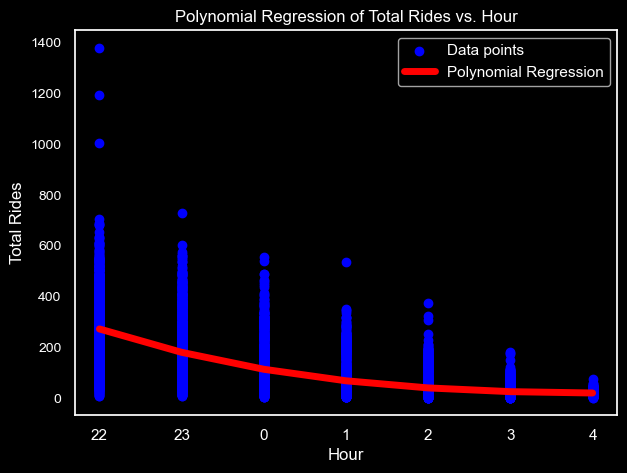

In [1156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load your dataset
df = encoded_night

# Map the hours to a new order where 22 and 23 appear before 0
hour_order = {22: -2, 23: -1, 0: 0, 1: 1, 2: 2, 3: 3, 4: 4}  # Custom order
df['Hour_mapped'] = df['Hour'].map(hour_order)  # Apply the mapping

# Prepare the Data with the new mapping
x_mapped = df['Hour_mapped'].values.reshape(-1, 1)
y = df['Total_rides'].values

# Polynomial Regression (degree 3) with the mapped x-values
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(x_mapped)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)
y_poly_pred = poly_reg_model.predict(x_poly)


# Plot actual vs. predicted values
fig , ax = plt.subplots (figsize = (7,5))
# Plot dataset and regression curve with the mapped x-values
plt.scatter(x_mapped, y, color='blue', label='Data points')  # Original data points
sorted_axis = np.argsort(x_mapped[:, 0])
plt.plot(x_mapped[sorted_axis], y_poly_pred[sorted_axis], color='red', linewidth=5, label='Polynomial Regression')  # Regression curve

# Customizing x-ticks with the new order
tick_values = list(hour_order.values())  # The mapped values
tick_labels = list(hour_order.keys())  # The original hour values as labels
plt.xticks(ticks=tick_values, labels=tick_labels, color='white')  # Apply the custom x-ticks
plt.yticks(fontsize=10, color='white')
plt.title('Polynomial Regression of Total Rides vs. Hour', color='white')
plt.xlabel('Hour', color= 'white')
plt.ylabel('Total Rides', color='white')

# Create legend
legend = plt.legend()

# Change the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')


plt.show()

## Temperature

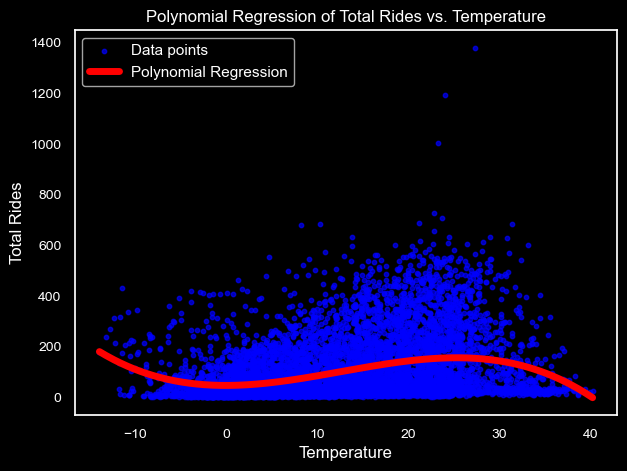

In [1157]:

# Load your dataset
df = encoded_night

# Prepare the Data with the new mapping
X = df['temperature_2m (°C)'].values.reshape(-1, 1)
Y = df['Total_rides'].values

# Polynomial Regression (degree 3) with the mapped x-values
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)
y_poly_pred = poly_reg_model.predict(x_poly)


# Plot actual vs. predicted values
fig , ax = plt.subplots (figsize = (7,5))
# Plot dataset and regression curve with the mapped x-values
plt.scatter(X, y, color='blue', label='Data points', alpha=0.7, s=10)  # Original data points
sorted_axis = np.argsort(X[:, 0])
plt.plot(X[sorted_axis], y_poly_pred[sorted_axis], color='red', linewidth=5, label='Polynomial Regression')  # Regression curve


plt.xticks(fontsize=10, color='white')  # Apply the custom x-ticks
plt.yticks(fontsize=10, color='white')
plt.title('Polynomial Regression of Total Rides vs. Temperature', color='white')
plt.xlabel('Temperature', color= 'white')
plt.ylabel('Total Rides', color='white')

# Create legend
legend = plt.legend()

# Change the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')


plt.show()

In [1158]:
encoded_night.head(2)

,Hour,Total_rides,temperature_2m (°C),weekendday,Hour_mapped
0,0,46.0,2.4,0,0
1,1,46.0,1.8,0,1


## Weekendday

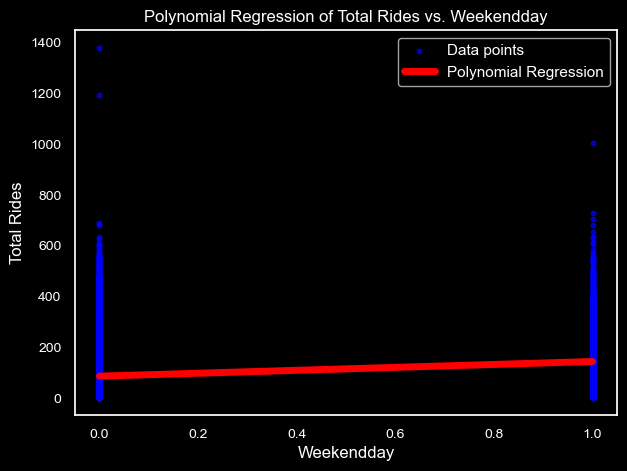

In [1159]:
# Load your dataset
df = encoded_night

# Prepare the Data with the new mapping
X = df['weekendday'].values.reshape(-1, 1)
Y = df['Total_rides'].values

# Polynomial Regression (degree 3) with the mapped x-values
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)
y_poly_pred = poly_reg_model.predict(x_poly)


# Plot actual vs. predicted values
fig , ax = plt.subplots (figsize = (7,5))
# Plot dataset and regression curve with the mapped x-values
plt.scatter(X, y, color='blue', label='Data points', alpha=0.7, s=10)  # Original data points
sorted_axis = np.argsort(X[:, 0])
plt.plot(X[sorted_axis], y_poly_pred[sorted_axis], color='red', linewidth=5, label='Polynomial Regression')  # Regression curve


plt.xticks(fontsize=10, color='white')  # Apply the custom x-ticks
plt.yticks(fontsize=10, color='white')
plt.title('Polynomial Regression of Total Rides vs. Weekendday', color='white')
plt.xlabel('Weekendday', color= 'white')
plt.ylabel('Total Rides', color='white')

# Create legend
legend = plt.legend()

# Change the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')


plt.show()